
# Загружаем данные

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)


In [3]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
929,930,60,RL,NaN,13006,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,222000
654,655,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,350000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000


# Exploratory data analysis, (EDA) 

In [4]:
A1 = set(train_df.Id.values)
A2 = set(test_df.Id.values)
print(len(A1 - A2), len(A1 & A2), len(A2 - A1))

1460 0 1459


показывается что нету одинаковых обьектов в данных. Нету пересечений

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
numeric_data = train_df.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
y = train_df['SalePrice']
train_df.fillna(numeric_data_mean, inplace=True)
correlations = train_df[numeric_data.columns].corrwith(y).sort_values(ascending=False)
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

Берем только числовые данные и проверим насколько они линейно зависимы

Text(0, 0.5, 'FEATURES')

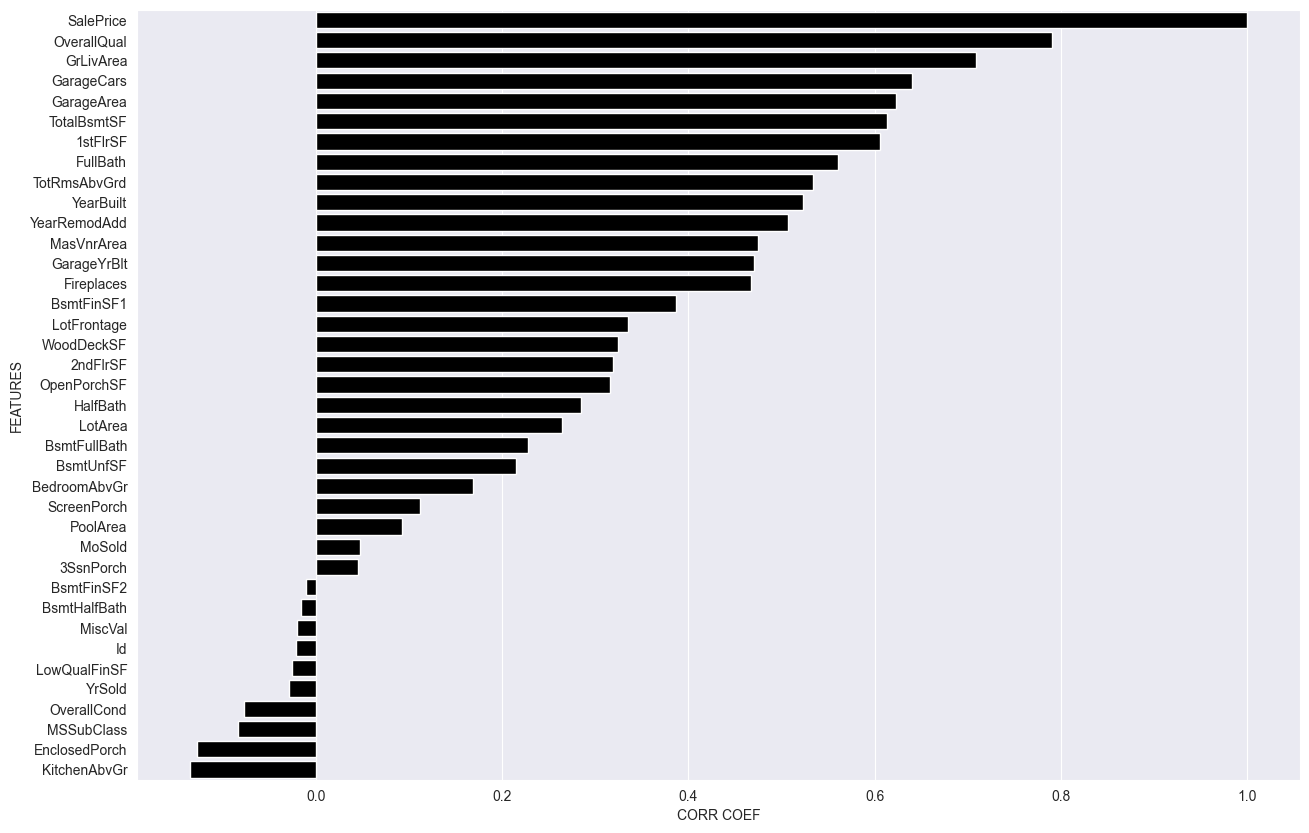

In [7]:
plot = sns.barplot(y=correlations.index, x=correlations, color='black')
plot.figure.set_size_inches(15, 10)
plt.xlabel('CORR COEF')
plt.ylabel('FEATURES')

In [8]:
index_to_drop = correlations.loc[correlations.abs() < 0.2]
index_to_drop.drop(["PoolArea", 'BsmtHalfBath', 'YrSold', 'BedroomAbvGr'], inplace=True)

In [9]:
index_to_drop

ScreenPorch      0.111447
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [10]:
train_df.drop(columns=index_to_drop.index, inplace=True)
train_df.shape

(1460, 70)

Удаляю столбов которые имеют очень малую кореляцию (0.2) и также которые не нужны. 

**Начинаю находить outliers и удалять их**

In [11]:
train_df.select_dtypes([np.number]).shape

(1460, 27)

In [12]:
train_df.select_dtypes([np.number])

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,YrSold,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,2008,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,2007,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,2008,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,0,2006,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,7,1,1999.0,2,460,0,40,0,2007,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,7,2,1978.0,2,500,349,0,0,2010,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,9,2,1941.0,1,252,0,60,0,2010,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,5,0,1950.0,1,240,366,0,0,2010,142125


In [13]:
train_df.dtypes[train_df.dtypes != 'object']

LotFrontage     float64
LotArea           int64
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
PoolArea          int64
YrSold            int64
SalePrice         int64
dtype: object

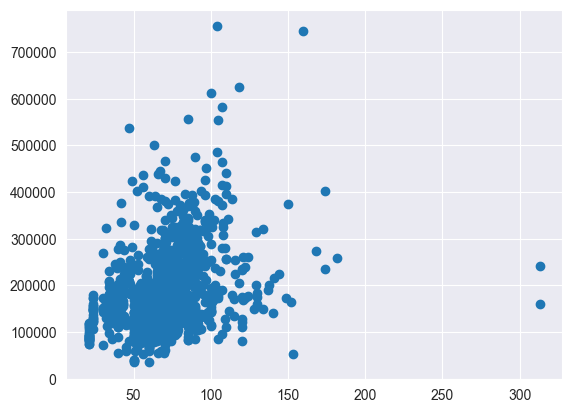

In [14]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

31.5 107.5


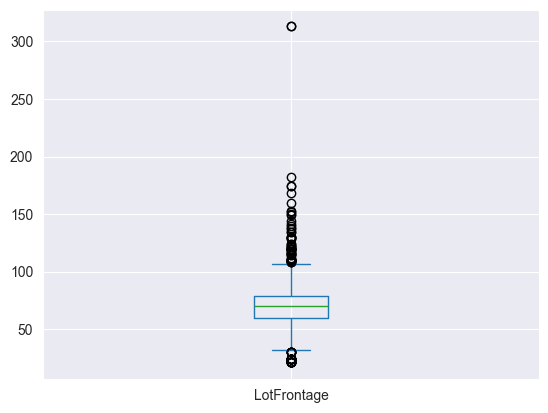

In [15]:
Q1 = train_df['LotFrontage'].quantile(0.25)
Q3 = train_df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['LotFrontage'].plot(kind='box')
plt.show()

In [16]:
outliers = train_df[(train_df['LotFrontage'] < lower_) | (train_df['LotFrontage'] > upper_)]
train_df.drop(outliers.index, inplace=True)
train_df[train_df['LotFrontage'] < lower_]

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice


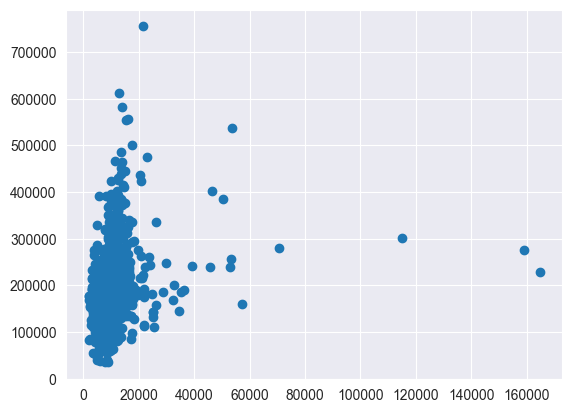

In [17]:
plt.scatter(x='LotArea', y="SalePrice", data=train_df)


2255.5 16891.5


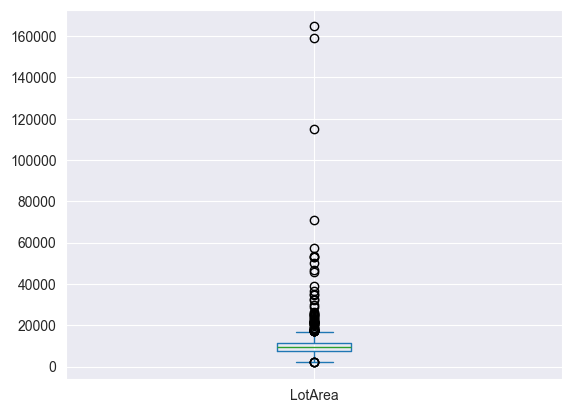

In [18]:
Q1 = train_df['LotArea'].quantile(0.25)
Q3 = train_df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['LotArea'].plot(kind='box')
plt.show()

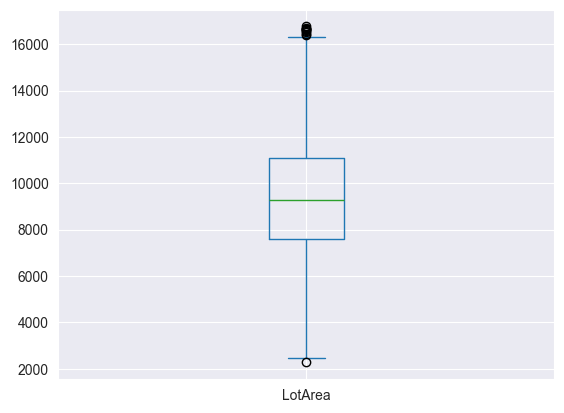

In [19]:
outliers = train_df[(train_df['LotArea'] <= lower_) | (train_df['LotArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['LotArea'].plot(kind='box')
plt.show()

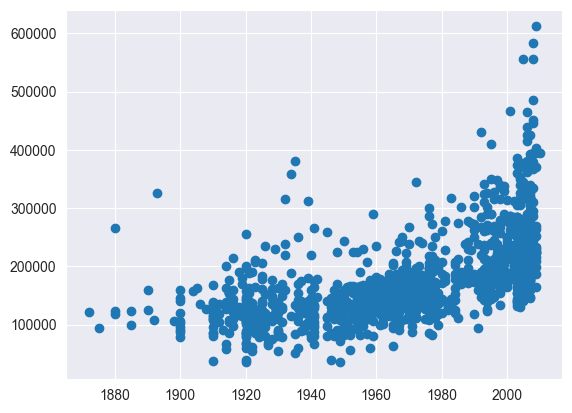

In [20]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)


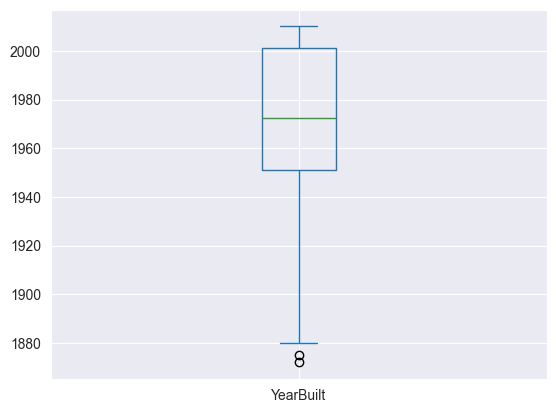

1876.0


In [21]:
Q1 = train_df['YearBuilt'].quantile(0.25)
Q3 = train_df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
train_df['YearBuilt'].plot(kind='box')
plt.show()
print(lower_)

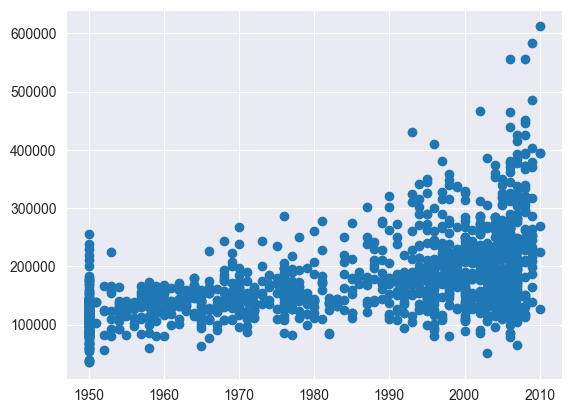

In [22]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)
plt.show()

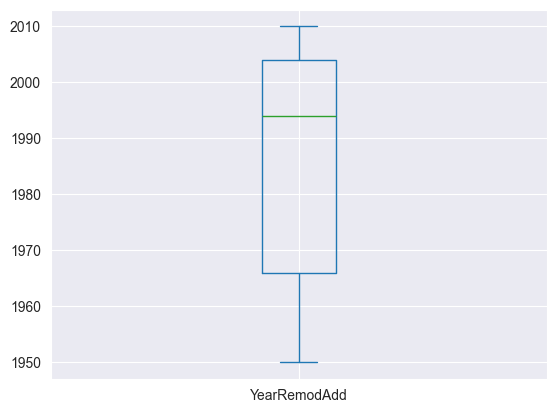

1909.0


In [23]:
Q1 = train_df['YearRemodAdd'].quantile(0.25)
Q3 = train_df['YearRemodAdd'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
train_df['YearRemodAdd'].plot(kind='box')
plt.show()
print(lower_)

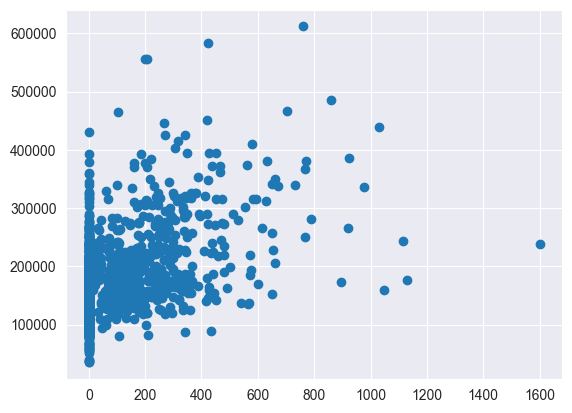

In [24]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)
plt.show()

-235.875 707.625


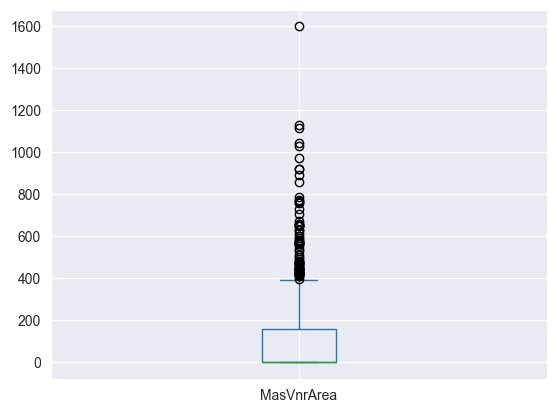

In [25]:
Q1 = train_df['MasVnrArea'].quantile(0.25)
Q3 = train_df['MasVnrArea'].quantile(0.75)
IQR = Q3 - Q1
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 3.5 * IQR
print(lower_, upper_)
train_df['MasVnrArea'].plot(kind='box')
plt.show()

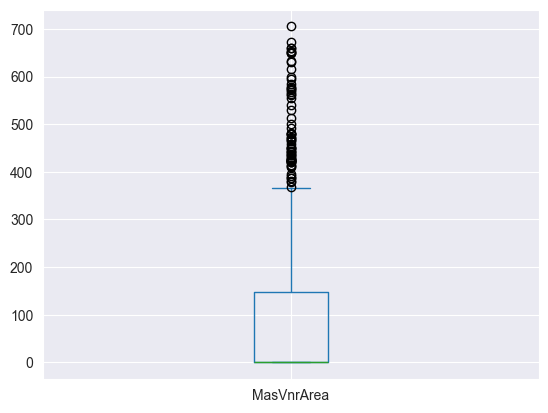

In [26]:
outliers = train_df[(train_df['MasVnrArea'] <= lower_) | (train_df['MasVnrArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['MasVnrArea'].plot(kind='box')
plt.show()

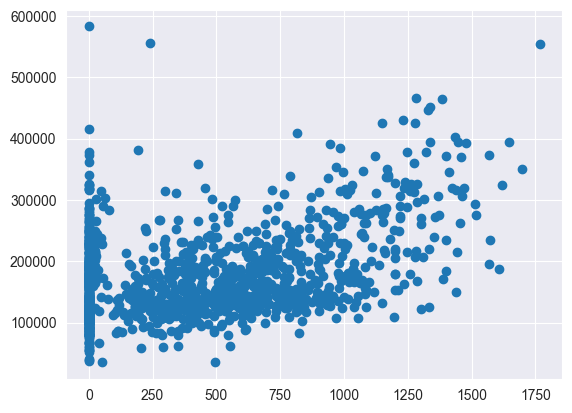

In [27]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)


-1050.75 1751.25


<Axes: >

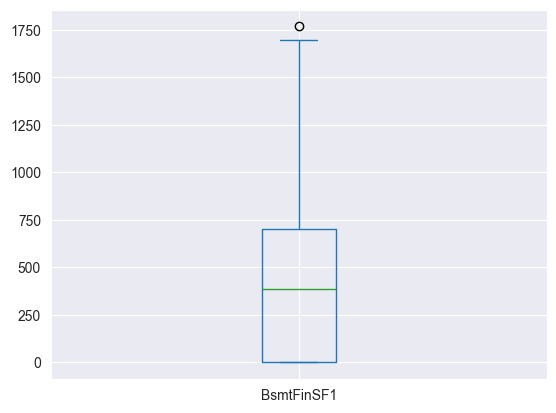

In [28]:
Q1 = train_df['BsmtFinSF1'].quantile(0.25)
Q3 = train_df['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['BsmtFinSF1'].plot(kind='box')

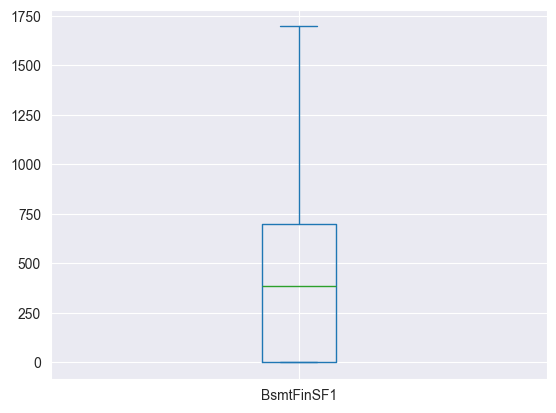

In [29]:
outliers = train_df[(train_df['BsmtFinSF1'] <= lower_) | (train_df['BsmtFinSF1'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['BsmtFinSF1'].plot(kind='box')
plt.show()

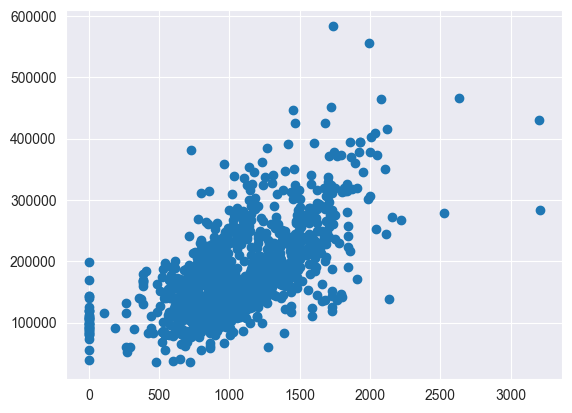

In [30]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)


In [31]:
train_df.drop(train_df.query('TotalBsmtSF > 2000').index, inplace=True)
train_df.query('TotalBsmtSF > 2000')

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice


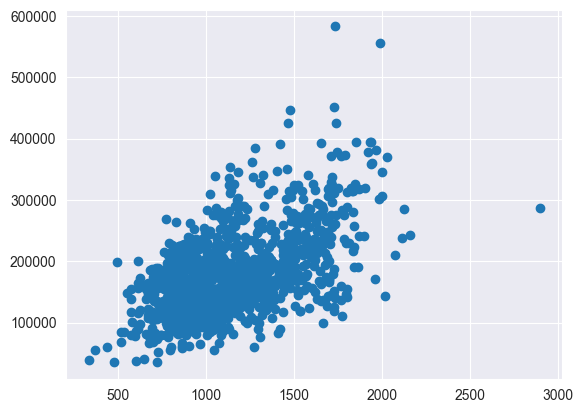

In [32]:
plt.scatter(x='1stFlrSF', y="SalePrice", data=train_df)

208.25 2018.25


<Axes: >

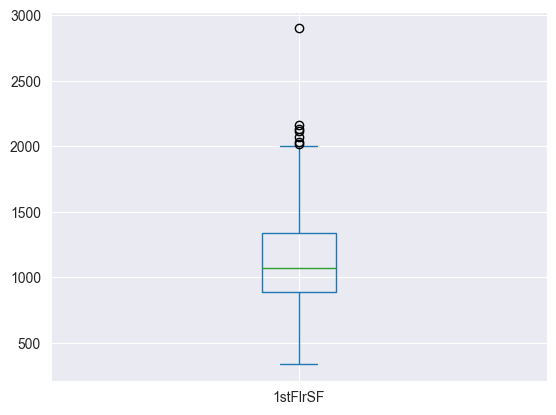

In [33]:
Q1 = train_df['1stFlrSF'].quantile(0.25)
Q3 = train_df['1stFlrSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['1stFlrSF'].plot(kind='box')

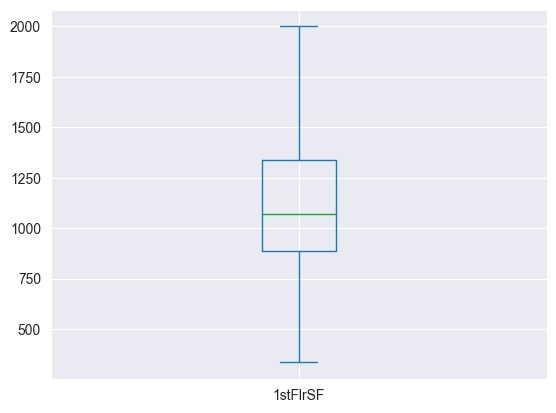

In [34]:
outliers = train_df[(train_df['1stFlrSF'] <= lower_) | (train_df['1stFlrSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['1stFlrSF'].plot(kind='box')
plt.show()

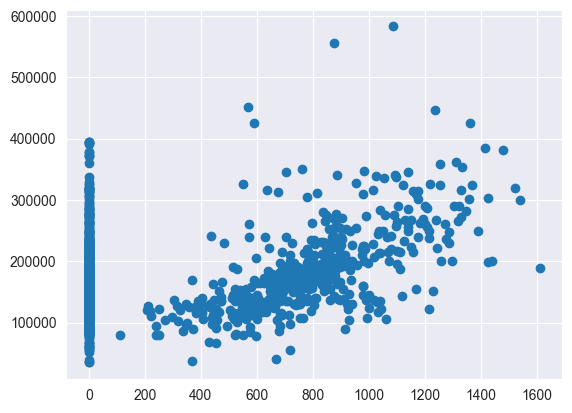

In [35]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

-1081.875 1803.125


<Axes: >

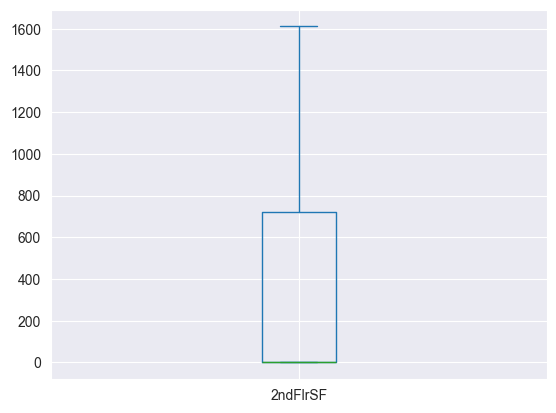

In [36]:
Q1 = train_df['2ndFlrSF'].quantile(0.25)
Q3 = train_df['2ndFlrSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['2ndFlrSF'].plot(kind='box')

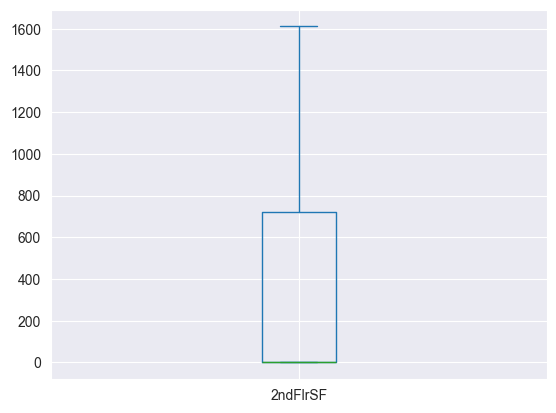

In [37]:
outliers = train_df[(train_df['2ndFlrSF'] <= lower_) | (train_df['2ndFlrSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['2ndFlrSF'].plot(kind='box')
plt.show()

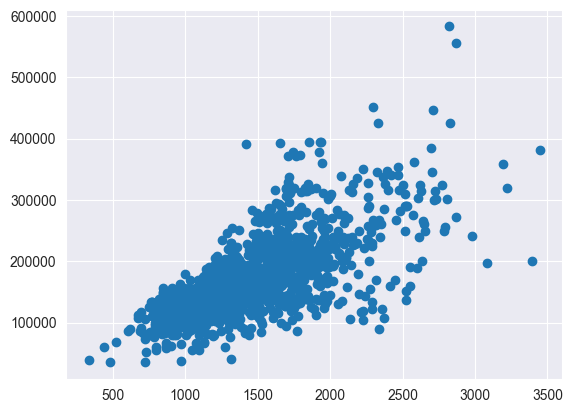

In [38]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)


193.0 2649.0


<Axes: >

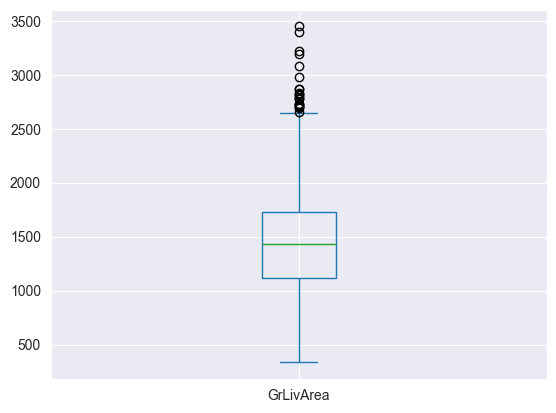

In [39]:
Q1 = train_df['GrLivArea'].quantile(0.25)
Q3 = train_df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GrLivArea'].plot(kind='box')

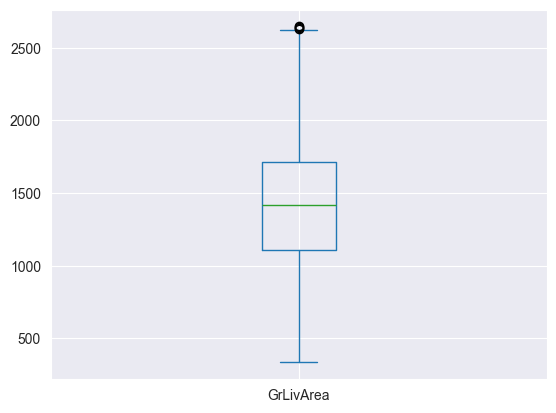

In [40]:
outliers = train_df[(train_df['GrLivArea'] <= lower_) | (train_df['GrLivArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GrLivArea'].plot(kind='box')
plt.show()

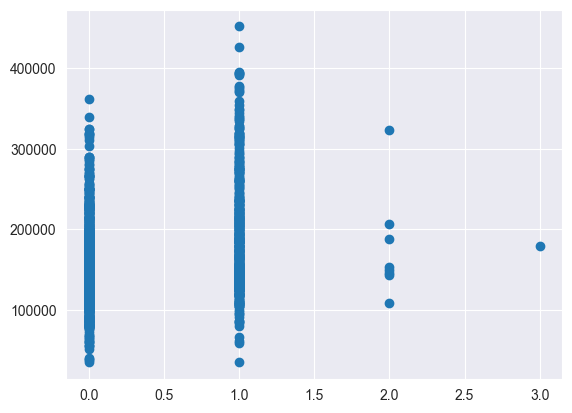

In [41]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

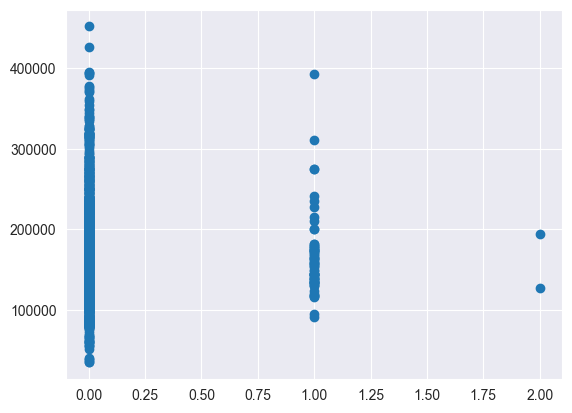

In [42]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)


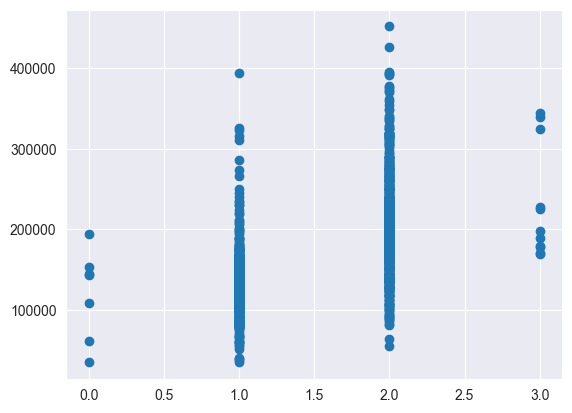

In [43]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)


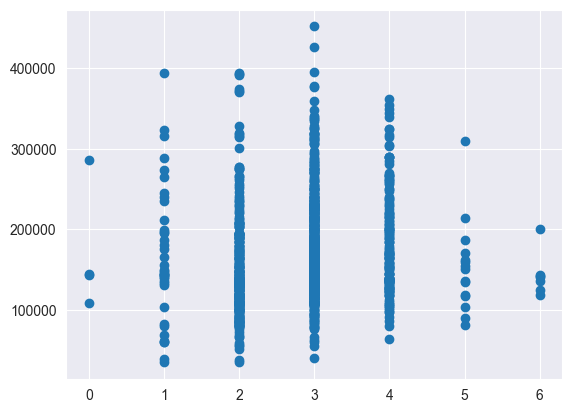

In [44]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

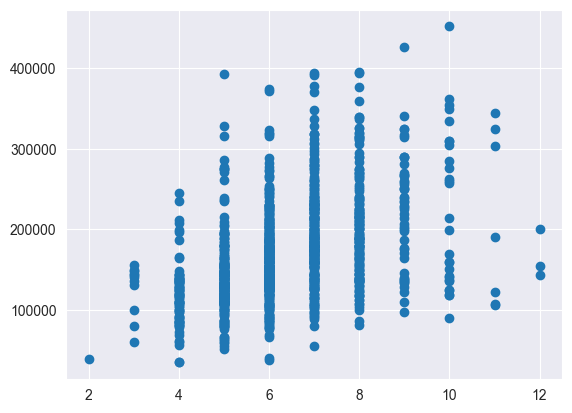

In [45]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

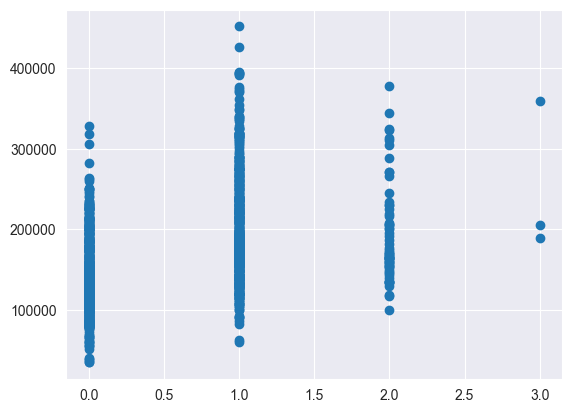

In [46]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)

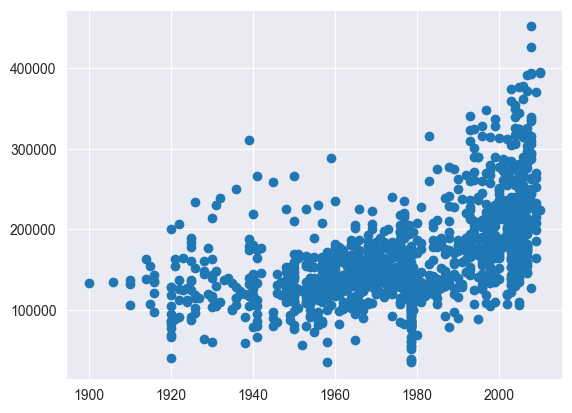

In [47]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data =train_df)

1901.0 2061.0


<Axes: >

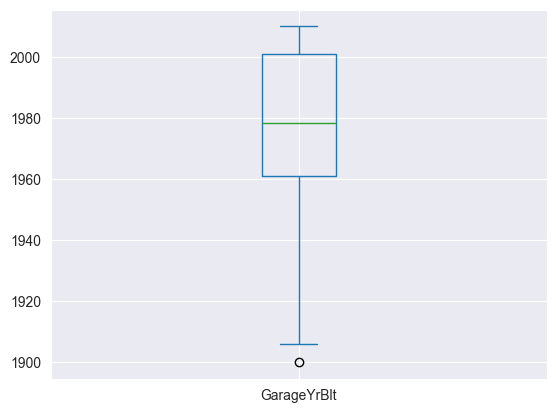

In [48]:
Q1 = train_df['GarageYrBlt'].quantile(0.25)
Q3 = train_df['GarageYrBlt'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GarageYrBlt'].plot(kind='box')

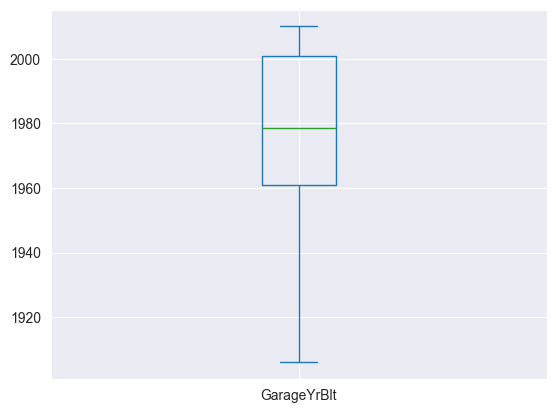

In [49]:
outliers = train_df[(train_df['GarageYrBlt'] <= lower_) | (train_df['GarageYrBlt'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GarageYrBlt'].plot(kind='box')
plt.show()

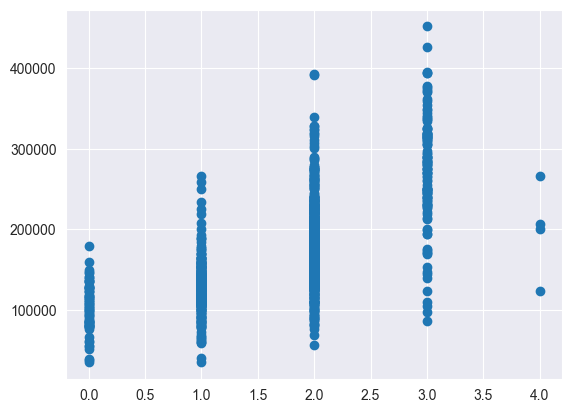

In [50]:
plt.scatter(x='GarageCars', y='SalePrice', data =train_df)

-0.5 3.5


<Axes: >

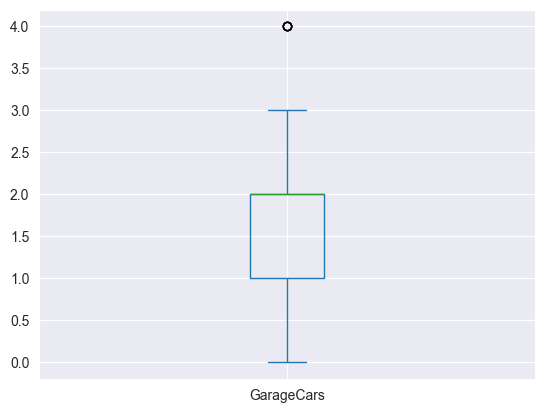

In [51]:
Q1 = train_df['GarageCars'].quantile(0.25)
Q3 = train_df['GarageCars'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GarageCars'].plot(kind='box')

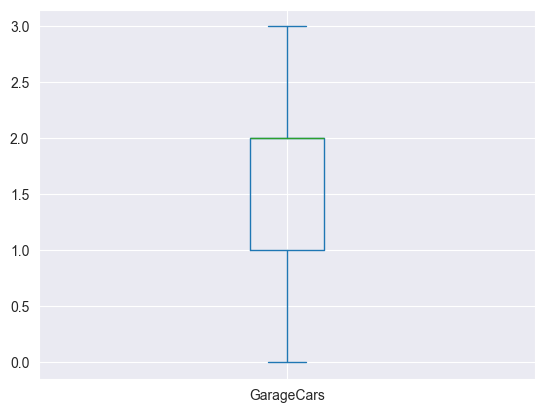

In [52]:
outliers = train_df[(train_df['GarageCars'] <= lower_) | (train_df['GarageCars'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GarageCars'].plot(kind='box')
plt.show()

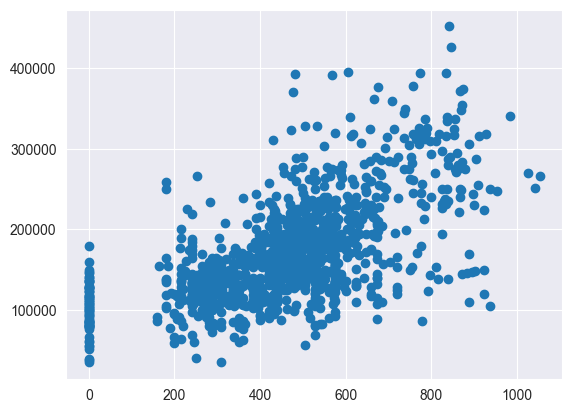

In [53]:
plt.scatter(x='GarageArea', y='SalePrice', data =train_df)

-88.0 968.0


<Axes: >

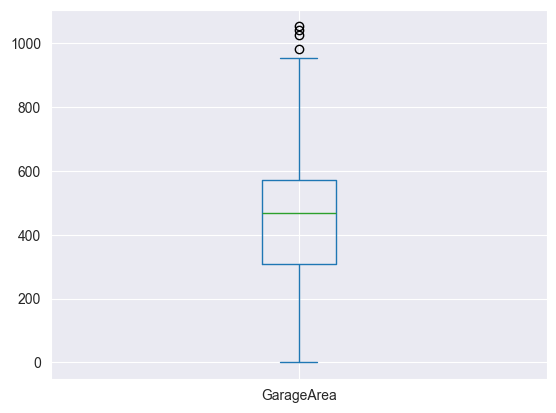

In [54]:
Q1 = train_df['GarageArea'].quantile(0.25)
Q3 = train_df['GarageArea'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['GarageArea'].plot(kind='box')

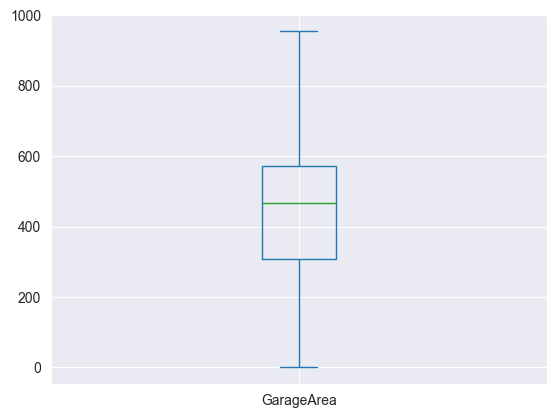

In [55]:
outliers = train_df[(train_df['GarageArea'] <= lower_) | (train_df['GarageArea'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['GarageArea'].plot(kind='box')
plt.show()

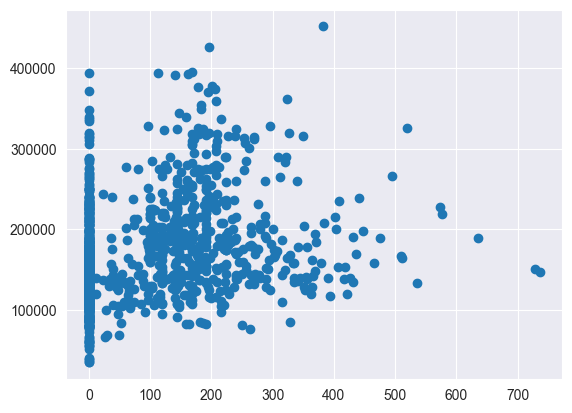

In [56]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data =train_df)

-246.0 410.0


<Axes: >

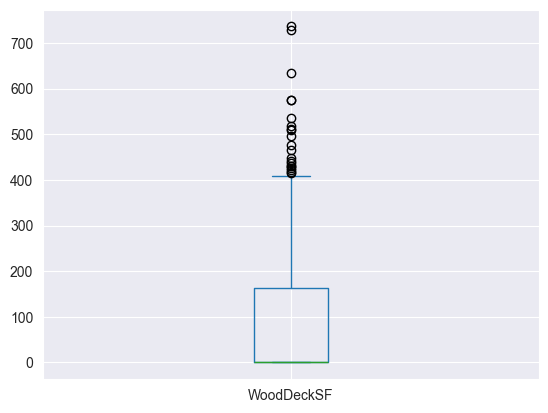

In [57]:
Q1 = train_df['WoodDeckSF'].quantile(0.25)
Q3 = train_df['WoodDeckSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['WoodDeckSF'].plot(kind='box')

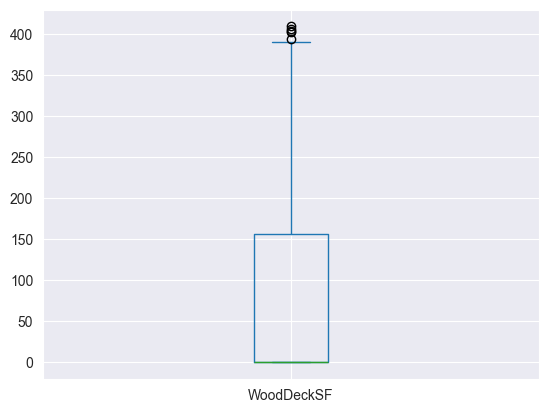

In [58]:
outliers = train_df[(train_df['WoodDeckSF'] <= lower_) | (train_df['WoodDeckSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['WoodDeckSF'].plot(kind='box')
plt.show()

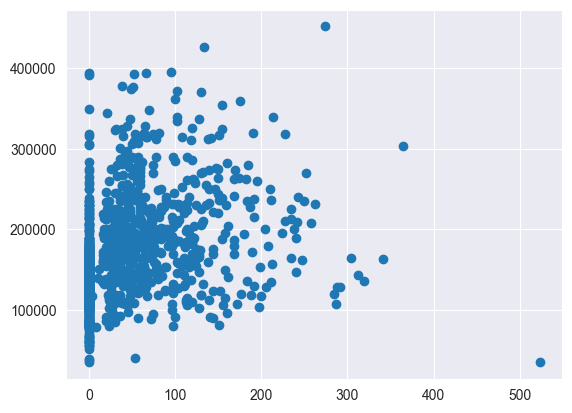

In [59]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data =train_df)


-96.0 160.0


<Axes: >

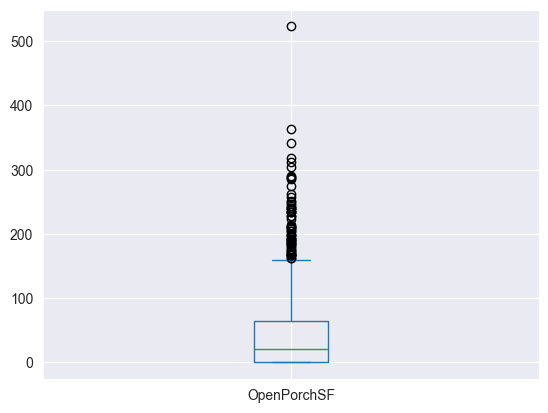

In [60]:
Q1 = train_df['OpenPorchSF'].quantile(0.25)
Q3 = train_df['OpenPorchSF'].quantile(0.75)
IQR = Q3 - Q1 
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR
print(lower_, upper_)
train_df['OpenPorchSF'].plot(kind='box')

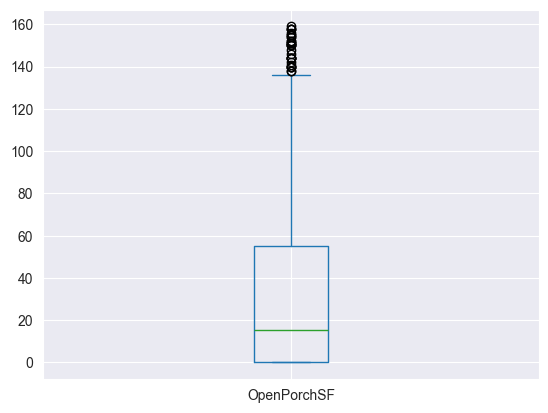

In [61]:
outliers = train_df[(train_df['OpenPorchSF'] <= lower_) | (train_df['OpenPorchSF'] >= upper_)]
train_df.drop(outliers.index, inplace=True)
train_df['OpenPorchSF'].plot(kind='box')
plt.show()

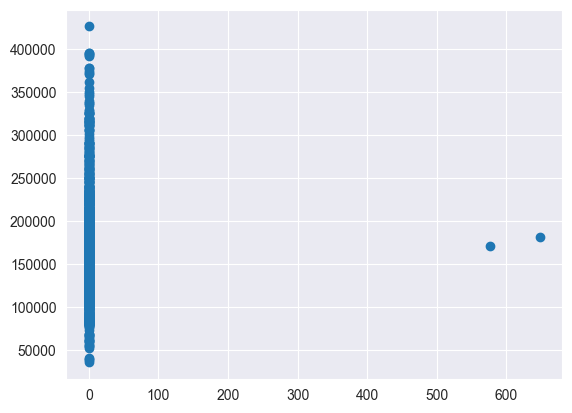

In [62]:
plt.scatter(x='PoolArea', y='SalePrice', data =train_df)


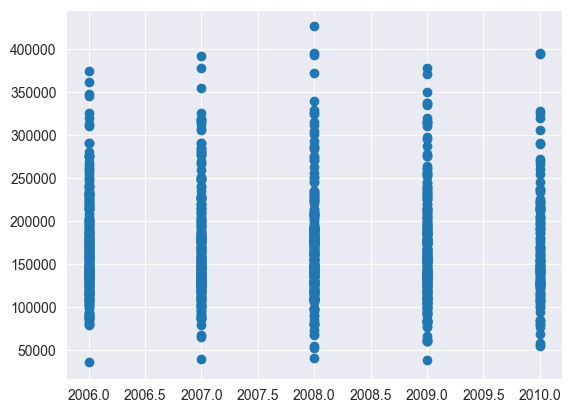

In [63]:
plt.scatter(x='YrSold', y='SalePrice', data =train_df)

**Еще раз чекаю корелляцию данных**

In [64]:
numeric_data = train_df.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
y = train_df['SalePrice']
train_df.fillna(numeric_data_mean, inplace=True)
correlations = train_df[numeric_data.columns].corrwith(y).sort_values(ascending=False)
correlations

SalePrice       1.000000
OverallQual     0.813368
GrLivArea       0.671515
GarageCars      0.650614
YearBuilt       0.640982
GarageArea      0.617753
TotalBsmtSF     0.592508
YearRemodAdd    0.568378
FullBath        0.553055
GarageYrBlt     0.551075
1stFlrSF        0.545959
MasVnrArea      0.469221
TotRmsAbvGrd    0.447255
OpenPorchSF     0.423319
Fireplaces      0.420541
BsmtFinSF1      0.384763
LotArea         0.327931
LotFrontage     0.309265
WoodDeckSF      0.307879
HalfBath        0.303291
2ndFlrSF        0.277978
BsmtFullBath    0.236692
BsmtUnfSF       0.168626
BedroomAbvGr    0.131492
PoolArea        0.005708
BsmtHalfBath   -0.011686
YrSold         -0.017763
dtype: float64

BsmtUnfSF       0.168626
BedroomAbvGr    0.131492
PoolArea        0.005708
BsmtHalfBath   -0.011686
YrSold         -0.017763
dtype: float64

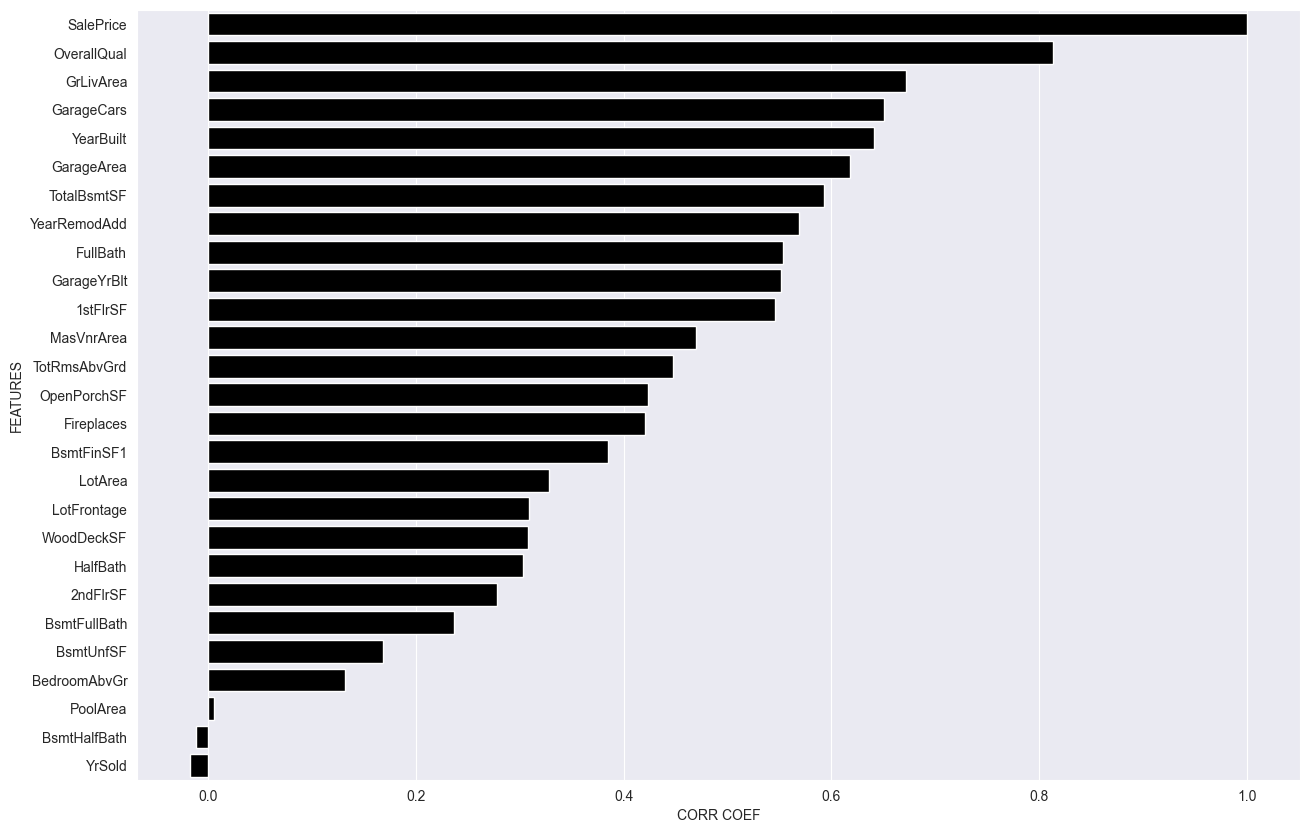

In [65]:
plot = sns.barplot(y=correlations.index, x=correlations, color='black')
plot.figure.set_size_inches(15, 10)
plt.xlabel('CORR COEF')
plt.ylabel('FEATURES')
index_to_drop = correlations.loc[correlations.abs() < 0.2]
index_to_drop

In [66]:
train_df.shape

(1132, 70)

In [67]:
train_df.drop(columns=index_to_drop.index, inplace=True)
train_df.shape

(1132, 65)

## Меняю категориальные данные на числовые используя OrdinalEncoder

In [68]:
from sklearn.preprocessing import OrdinalEncoder

categorical = train_df.select_dtypes(include=['object'])
encoder = OrdinalEncoder()
train_df[categorical.columns] = encoder.fit_transform(train_df[categorical.columns])
train_df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3.0,65.0,8450,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,61,NaN,NaN,NaN,8.0,4.0,208500
1,3.0,80.0,9600,1.0,NaN,3.0,3.0,0.0,2.0,0.0,...,4.0,2.0,298,0,NaN,NaN,NaN,8.0,4.0,181500
2,3.0,68.0,11250,1.0,NaN,0.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,42,NaN,NaN,NaN,8.0,4.0,223500
3,3.0,60.0,9550,1.0,NaN,0.0,3.0,0.0,0.0,0.0,...,4.0,2.0,0,35,NaN,NaN,NaN,8.0,0.0,140000
4,3.0,84.0,14260,1.0,NaN,0.0,3.0,0.0,2.0,0.0,...,4.0,2.0,192,84,NaN,NaN,NaN,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4.0,35.0,3675,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,28,NaN,NaN,NaN,8.0,4.0,145000
1454,1.0,62.0,7500,1.0,1.0,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,113,NaN,NaN,NaN,8.0,4.0,185000
1455,3.0,62.0,7917,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,40,NaN,NaN,NaN,8.0,4.0,175000
1457,3.0,66.0,9042,1.0,NaN,3.0,3.0,0.0,4.0,0.0,...,4.0,2.0,0,60,NaN,0.0,2.0,8.0,4.0,266500


In [69]:
train_df.isna().sum()

MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1067
                 ... 
Fence             897
MiscFeature      1089
SaleType            0
SaleCondition       0
SalePrice           0
Length: 65, dtype: int64

In [70]:
percent = 0
for i in train_df.columns:
    percent = (train_df[i].isna().sum()/train_df[i].shape[0])*100
    if percent > 0:
        train_df.drop(columns=i, inplace=True)
        print(i)
        percent = 30
    else:
        percent = 0
train_df.sample(15)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
1295,3.0,70.000000,8400,1.0,3.0,3.0,0.0,4.0,0.0,10.0,...,0,1968.000000,1,288,2.0,356,0,8.0,4.0,138500
613,3.0,70.000000,8402,1.0,3.0,3.0,0.0,4.0,0.0,9.0,...,0,1978.506164,0,0,2.0,0,30,6.0,5.0,147000
386,3.0,58.000000,8410,1.0,3.0,3.0,0.0,2.0,0.0,5.0,...,0,1978.506164,0,0,0.0,0,151,8.0,1.0,81000
337,3.0,70.000000,9135,1.0,3.0,3.0,0.0,4.0,0.0,3.0,...,0,2002.000000,2,532,2.0,192,74,8.0,4.0,214000
1319,3.0,75.000000,10215,1.0,3.0,0.0,0.0,4.0,0.0,5.0,...,0,1954.000000,1,248,2.0,0,0,8.0,4.0,111000
590,3.0,64.000000,8320,1.0,3.0,3.0,0.0,4.0,0.0,3.0,...,0,2004.000000,2,520,2.0,0,45,8.0,4.0,185900
229,3.0,43.000000,3182,1.0,3.0,3.0,0.0,4.0,0.0,0.0,...,1,2005.000000,2,430,2.0,143,20,8.0,4.0,192500
625,3.0,87.000000,10000,1.0,0.0,3.0,0.0,0.0,0.0,10.0,...,0,1962.000000,2,440,2.0,0,0,8.0,4.0,160000
562,3.0,63.000000,13907,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,1,1978.506164,0,0,2.0,144,0,8.0,4.0,108000
810,3.0,78.000000,10140,1.0,3.0,3.0,0.0,4.0,0.0,12.0,...,1,1974.000000,2,484,2.0,265,0,8.0,4.0,181000


Удалил колонны которые имеют больше 30% пустые ячейки 

In [71]:
train_df = train_df.apply(lambda x: x.fillna(x.median()), axis=0)
train_df.isna().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = train_df.loc[:, train_df.columns!='SalePrice']
y = train_df['SalePrice']
display(X, y)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,3.0,...,5.0,0,2003.0,2,548,2.0,0,61,8.0,4.0
1,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,22.0,...,5.0,1,1976.0,2,460,2.0,298,0,8.0,4.0
2,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,3.0,...,5.0,1,2001.0,2,608,2.0,0,42,8.0,4.0
3,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,4.0,...,5.0,1,1998.0,3,642,2.0,0,35,8.0,0.0
4,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,13.0,...,5.0,1,2000.0,3,836,2.0,192,84,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4.0,35.0,3675,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,5.0,0,2005.0,2,525,2.0,0,28,8.0,4.0
1454,1.0,62.0,7500,1.0,3.0,3.0,0.0,4.0,0.0,19.0,...,5.0,0,2004.0,2,400,2.0,0,113,8.0,4.0
1455,3.0,62.0,7917,1.0,3.0,3.0,0.0,4.0,0.0,6.0,...,5.0,1,1999.0,2,460,2.0,0,40,8.0,4.0
1457,3.0,66.0,9042,1.0,3.0,3.0,0.0,4.0,0.0,4.0,...,5.0,2,1941.0,1,252,2.0,0,60,8.0,4.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1452    145000
1454    185000
1455    175000
1457    266500
1458    142125
Name: SalePrice, Length: 1132, dtype: int64

**Делю данные на обучающую и тестовую.**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## Первая модель применяю randomforest 

In [74]:
from sklearn.ensemble import RandomForestRegressor

ranmodel = RandomForestRegressor()
ranmodel.fit(X_train, y_train)
y_pred = ranmodel.predict(X_test)
ranmodel.score(X_test, y_test)

0.8740607350812711

## Перевожу данные в один диапазон и применяю линейную регрессию

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
display(X_train, X_test)

array([[ 1.72786305, -1.35882261, -1.17892986, ..., -0.76808995,
         0.28543676,  0.22037697],
       [-0.11643282,  0.12125428, -0.40709888, ..., -0.76808995,
         0.28543676,  0.22037697],
       [ 1.72786305, -2.09701711, -2.03756912, ..., -0.76808995,
         0.28543676,  0.22037697],
       ...,
       [ 1.72786305, -2.09701711, -1.76007318, ..., -0.76808995,
         0.28543676,  0.22037697],
       [-0.11643282,  2.03687207,  1.16162488, ...,  0.82029466,
        -1.14990239,  1.16382864],
       [-0.11643282,  0.12125428,  0.09341081, ..., -0.09422981,
         0.28543676,  0.22037697]])

array([[-0.11643282, -0.62062812, -0.74307236, ..., -0.76808995,
         0.28543676,  0.22037697],
       [-0.11643282, -0.62062812, -0.40782531, ...,  0.74809536,
         0.28543676,  0.22037697],
       [ 1.72786305,  0.12125428, -2.24242214, ..., -0.28676128,
         0.28543676,  0.22037697],
       ...,
       [-3.80502455,  2.33214987,  1.20085206, ...,  2.50494499,
         0.28543676,  0.22037697],
       [-0.11643282, -0.47298922, -0.36387634, ...,  0.38709886,
         0.28543676,  0.22037697],
       [-0.11643282,  1.96305262,  0.92299291, ...,  0.67589606,
         0.28543676,  0.22037697]])

In [76]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predr = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.8644119597008146

**Метрики MSE, MAE, RMSE, R2R**

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

mse = mean_squared_error(y_test, y_predr)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_predr, squared=False)
r2r = r2_score(y_test, y_predr)
print(mse, mae, rmse, r2r)

493732000.9347624 14444.415735294117 22220.081028987326 0.8644119597008146


C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Кросс валидация по RMSE**

In [78]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -19968.2824
	-21824.4211
	-23673.2535
	-21123.6088
	-21820.9623
Mean CV RMSE = 21682.1056


**Кросс валидация по R2**

In [79]:
cv_scoresr2 = cross_val_score(regressor, X, y, cv=5, scoring="r2")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scoresr2))
print("Mean CV R2 = %.4f" % np.mean(cv_scoresr2))

Cross validation scores:
	 0.8877
	0.8929
	0.8440
	0.8743
	0.8563
Mean CV R2 = 0.8710


<Axes: >

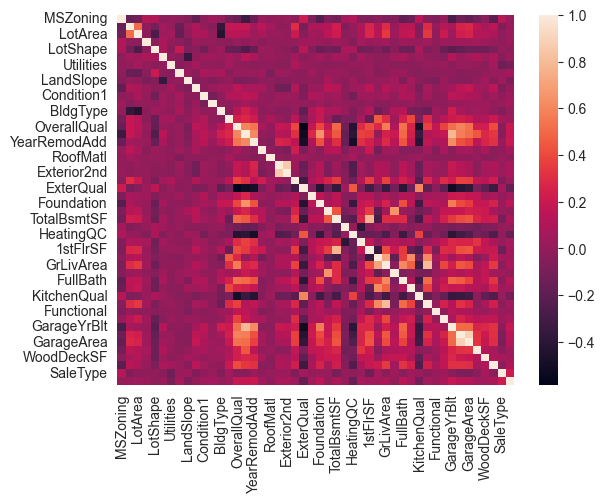

In [80]:
sns.heatmap(X.corr())

Здесь зависимость между фичами сильная (мултикореляционность)
Можем применить регуляризацию.

**Регуляризация Ridge**

In [81]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
alpha = np.logspace(-2, 3, 20)
modelR = Ridge()
searcher = GridSearchCV(modelR, [{'alpha': alpha}], scoring='neg_root_mean_squared_error', cv=5)
searcher.fit(X_train, y_train)

print('Best parameters: ', searcher.best_params_['alpha'])

Best parameters:  26.366508987303583


In [82]:
best_model = Ridge(searcher.best_params_['alpha'])
best_model.fit(X_train, y_train)
best_y = best_model.predict(X_test)
best_y

array([169623.94805127, 180455.12507076, 180756.28099393, 158049.10908289,
       117810.61696029, 124680.23233842, 212395.72053367, 105747.98456339,
       164362.44216524, 106230.79507195, 129308.95397477, 185239.69119468,
       131797.13927781, 238123.10346786, 183221.03641447, 101087.27846862,
       117168.73742534, 220955.70943264, 111408.90605725, 209311.86451131,
        88206.37147816, 121371.82547533,  86727.20371994, 191424.92833379,
        78050.73216045, 203853.94916852, 236494.30105536, 199767.79355969,
       148378.18745059, 140409.92926291, 185446.38017271, 164422.32093399,
       168471.6488174 , 220182.09751383,  88144.99360043, 201084.72569292,
       104282.08499368, 102878.75805337, 156001.66342251, 174766.80871613,
       181445.64225046, 194488.36935379, 117399.51714486,  75824.80282776,
       107946.27878016, 174138.40148822, 142686.14920663, 226369.74785632,
       139292.9400191 , 290175.52051689, 176767.30085728, 206372.85269444,
       125557.72489817, 1

In [83]:
mse = mean_squared_error(y_test, best_y)
mae = mean_absolute_error(y_test, best_y)
rmse = mean_squared_error(y_test, best_y, squared=False)
r2 = r2_score(y_test, best_y)
print(mse, mae, rmse, r2)

481740627.450449 16167.587638307346 21948.590557264695 0.8677050150996047


C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [84]:
modelL = Lasso()
searcher = GridSearchCV(modelL, [{'alpha': alpha}], cv=5, scoring='neg_root_mean_squared_error')
searcher.fit(X_train, y_train)
best_alphaL = searcher.best_params_['alpha']
print(best_alphaL)

C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.731e+09, tolerance: 2.423e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+11, tolerance: 2.363e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

297.63514416313194


In [85]:
print(searcher.best_estimator_)

Lasso(alpha=297.63514416313194)


In [86]:
modelL = Lasso(best_alphaL)
modelL.fit(X_train, y_train)

best_yL = modelL.predict(X_test)
best_yL

array([169706.30467934, 180604.38672387, 180610.21026369, 157042.15200454,
       114123.45697937, 127005.73661366, 212435.14006204, 108342.82909122,
       160703.15318926, 106568.296131  , 128242.47312291, 186781.77931249,
       130973.43525024, 237177.69902981, 180854.08029179,  99606.31526629,
       117831.3634227 , 221031.00911451, 113382.27789006, 210618.67810395,
        89690.04625159, 122504.448632  ,  86641.09672731, 192187.52791762,
        78637.7959544 , 204831.8828564 , 235688.0285759 , 199045.51070466,
       147979.65202125, 138452.23447872, 185984.64332008, 167151.37605798,
       168575.27517772, 220917.38706445,  89419.99287586, 201220.95839793,
       101922.42323342, 102287.8690191 , 156227.23366827, 176009.58206459,
       182095.27302535, 190881.47485193, 130001.61971813,  78988.60291341,
       106377.70487918, 174082.19313261, 141462.49217306, 225209.95050784,
       139826.97452113, 289355.85799982, 173407.00705041, 206584.65774931,
       123732.36271751, 1

In [87]:
mse = mean_squared_error(y_test, best_yL)
mae = mean_absolute_error(y_test, best_yL)
rmse = mean_squared_error(y_test, best_yL, squared=False)
r2 = r2_score(y_test, best_yL)
print(mse, mae, rmse, r2)

472430707.8493191 15977.124998335945 21735.471189953972 0.8702616931185914


C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
cv_scoresr = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scoresr))
print("Mean CV R2 = %.4f" % np.mean(cv_scoresr))

Cross validation scores:
	 0.8877
	0.9021
	0.8465
	0.8770
	0.8547
Mean CV R2 = 0.8736


In [89]:
cv_scoresL = cross_val_score(modelL, X, y, cv=5, scoring='r2')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scoresL))
print("Mean CV R2 = %.4f" % np.mean(cv_scoresL))

Cross validation scores:
	 0.8866
	0.9028
	0.8495
	0.8784
	0.8536
Mean CV R2 = 0.8742
